# Meeting 1: Jupyter Notebook / PCA / PCoA
#### Freddy Francis (Friday March 13, 2020)

## 1. Introduction to Jupyter Lab

1. Jupyter notebooks is an interactive notebook that can run code and have formatted text.
2. They are reproducible and can be exported in many formats such as slides, pdf and html.
3. Each cell can be run as a code or markdown.
4. Since we use R, I have included instruction on how to install R for Jupyter notebooks below. 

This [link](https://youtu.be/2yv4pEmFgnw) has a 8 minute video tutorial/ introduction for jupyter notebooks for reference.

#### _Installation of Jupyter lab : Download Anaconda navigator (should automatically download with a python installed)_


[Anaconda Distribution](https://www.anaconda.com/distribution/) <-- download link <br>
[Link to install R for anaconda](https://richpauloo.github.io/2018-05-16-Installing-the-R-kernel-in-Jupyter-Lab/) <br>
* Run the IRkernel from the terminal. <br>

[Jupyter notebook shortcuts](https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330)<br>
[Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#images)

## 2. Edit community agreement.

## 3. PCA - Principle Component analysis

* A procedure that uses orthogonal transformations (WTH?)
* The first PC accounts for the most variation in the dataset

Lets start with this data set:

| Organism | Pt1 | Pt2 | Pt3 | Pt4 | Pt5 | Pt6 |
|----------|-----|-----|-----|-----|-----|-----|
| ESBL     | 10  | 11  | 8   | 3   | 2   | 1   |
| CPE      | 6   | 4   | 5   | 3   | 3   | 1   |
| TET      | 12  | 9   | 10  | 3   | 2   | 2   |
| MIS      | 5   | 7   | 6   | 2   | 4   | 7   |

We are measuring the ESBL and CPE organisms in the stool of 6 patients.

* Lets for now just take ESBL and CPE organisms and plot it. 

In [1]:
        #loading dependencies
library(dplyr)
library(tidyverse)
library(ggplot2)
#reading in data
df<- read_csv("meeting1_data.csv")
#view df
df


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ stringr 1.4.0
✔ tidyr   1.0.2     ✔ forcats 0.5.0
✔ readr   1.3.1     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Parsed with column specification:
cols(
  Organism = col_character(),
  Pt1 = col_double(),
  Pt2 = col_double(),
  Pt3 = col_double(),
  Pt4 = col_double(),
  Pt5 = col_double(),
  Pt6 = col_double()
)



Organism,Pt1,Pt2,Pt3,Pt4,Pt5,Pt6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ESBL,10,11,8,3,2,1
CPE,6,4,5,3,3,1
TET,12,9,10,3,2,2
MIS,5,7,6,2,4,7


In [2]:
df1<-df[1:2,]
df2<-t(df1)
rownames(df2)<-NULL
colnames(df2) <- as.character(unlist(df2[1,]))
df2 = df2[-1, ]
df2<-as.data.frame(df2)
df2[] <- as.numeric(as.matrix(df2))
df2

ESBL,CPE
<dbl>,<dbl>
10,6
11,4
8,5
3,3
2,3
1,1


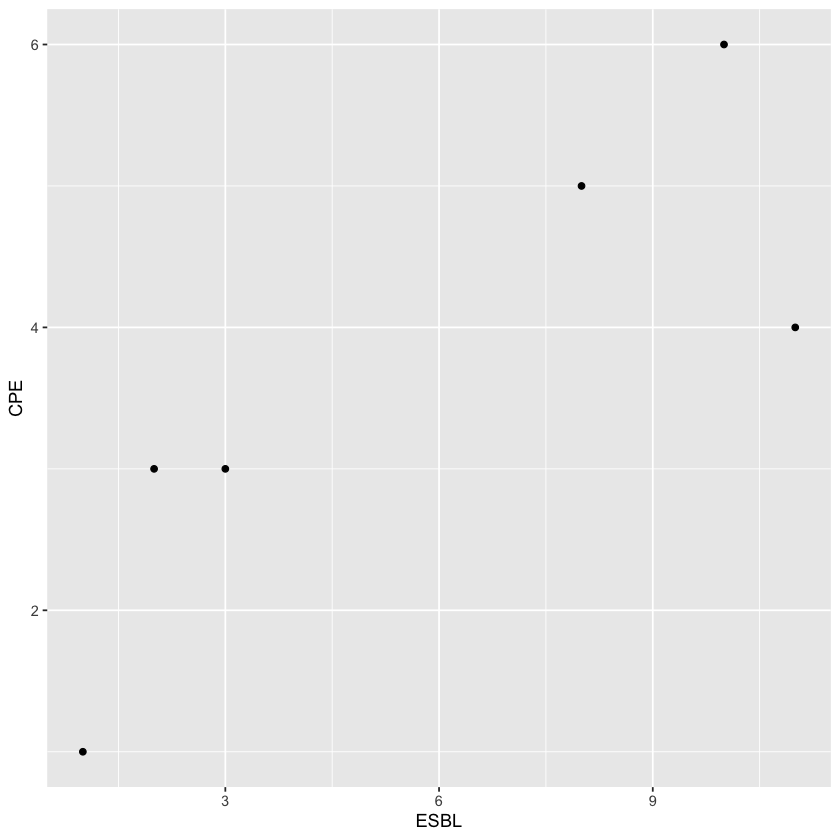

In [3]:
#plotting bivariate data
plot1<- ggplot(df2, mapping=aes(x=ESBL,y=CPE))+geom_point()
plot1

`geom_smooth()` using formula 'y ~ x'



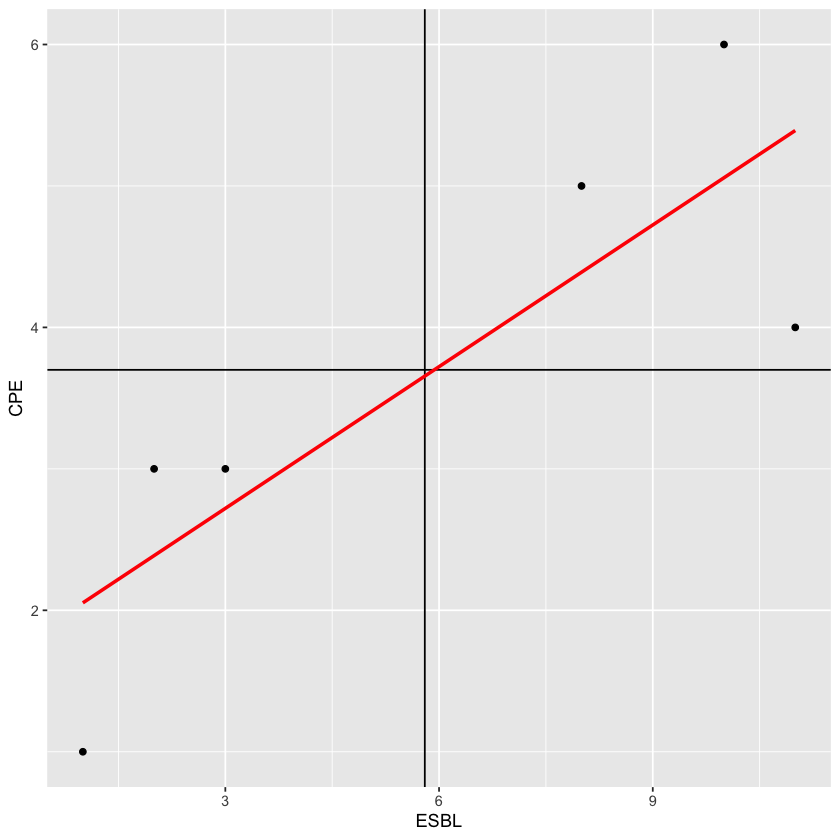

In [4]:
plot1+geom_hline(yintercept=3.7)+geom_vline(xintercept=5.8)+geom_smooth(method="lm", se=F, color="red")
#drawing the line of best fit by minimizing the distances between the points and the line drawn

This line had the largest sum of squared distances (aka the eigenvalue)

Slope of this line - the principle component

The slope is used to calculate the unit vector and this vector is known as the eigenvector and the pythagorean proportions of each gene will be called the loading scores.

The PC2 is just a line perpendicular to PC1

variation around the origin is calculated by dividing eigenvalue by sample size(n-1) 

,ESBL,CPE
,<dbl>,<dbl>
Pt1,10,6
Pt2,11,4
Pt3,8,5
Pt4,3,3
Pt5,2,3
Pt6,1,1


Importance of components:
                          PC1     PC2
Standard deviation     4.6023 0.92322
Proportion of Variance 0.9613 0.03868
Cumulative Proportion  0.9613 1.00000

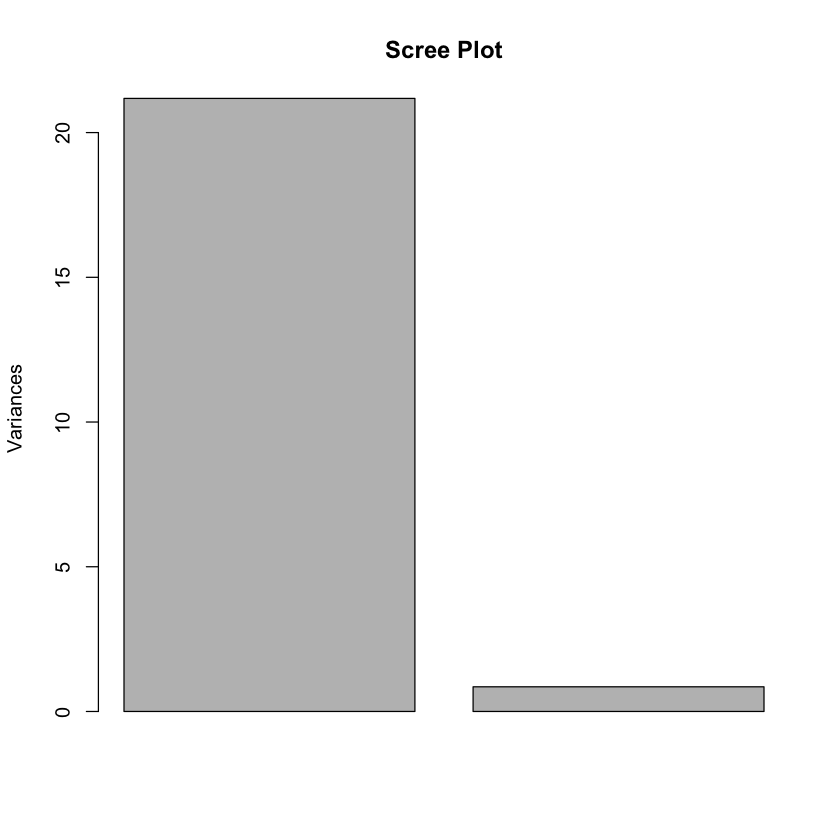

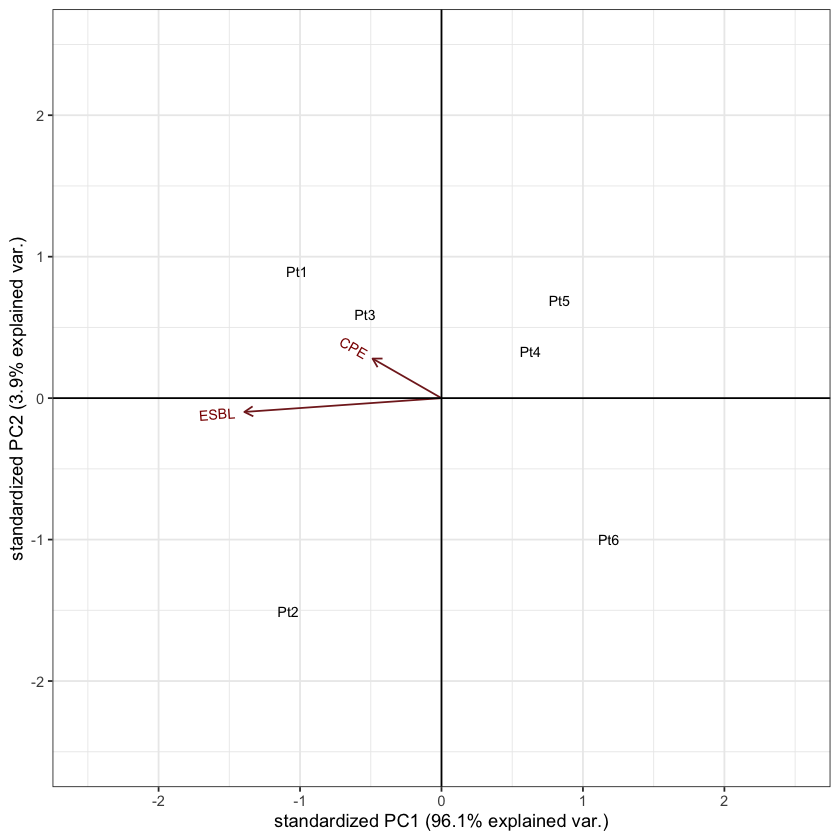

In [26]:
df3<-t(df1)
colnames(df3) <- as.character(unlist(df3[1,]))
df3 = df3[-1, ]
df3<-as.data.frame(df3)
df3[] <- as.numeric(as.matrix(df3))
df3

pcs <- prcomp(df3, center =T)
summary(pcs)
plot(pcs, main="Scree Plot")
#library(devtools)
#install_github("vqv/ggbiplot")
library(ggbiplot)
ggbiplot(pcs,labels=rownames(df3))+
    geom_hline(yintercept=0)+
    geom_vline(xintercept=0)+
    xlim(-2.5,2.5)+ylim(-2.5,2.5)+theme_bw()

In [11]:
#Construct a sample data matrix
dm<- matrix(nrow=100, ncol=10)
colnames(dm)<- c(
  paste("Pt", 1:10, sep=""))

rownames(dm) <- c(
    paste("ESBL", 1:25, sep=""),
    paste("CPE", 1:25, sep=""),
    paste("TET", 1:25, sep=""),
    paste("other", 1:25, sep=""))

In [40]:
library(MASS)
for (i in 1:100){
    #Density, distribution function, quantile function 
    #and random generation for the Poisson distribution with parameter lambda.
    #you can choose to generate whatever type of distribution you may please.
    #rnegbin(n, mu = n, theta = stop("'theta' must be specified"))
    #Arguments
    #n	If a scalar, the number of sample values required. If a vector, length(n) is the number required and n is used as the mean vector if mu is not specified.
    #mu	The vector of means. Short vectors are recycled.
    #theta	Vector of values of the theta parameter. Short vectors are recycled.
    Pt.values <- rpois(10, lambda=sample(x=10:1000, size=1))   
    #Pt.values<- rnegbin(n=10, theta=sample(x=10:1000, size=1))
    #for every iteration of i 10 values are generated and are being inserted into the above generated data frame.
    dm[i,] <- c(Pt.values)
}

#head(dm)

In [41]:
#Using prcomp to generate PCA. 
#prcomp expects samples to be rows

pca<- prcomp(t(dm),scale=T)


The output has three things:
1. X - contains the principle components to draw a graph.
2. Sdev - give you variation
3. rotation - loading scores

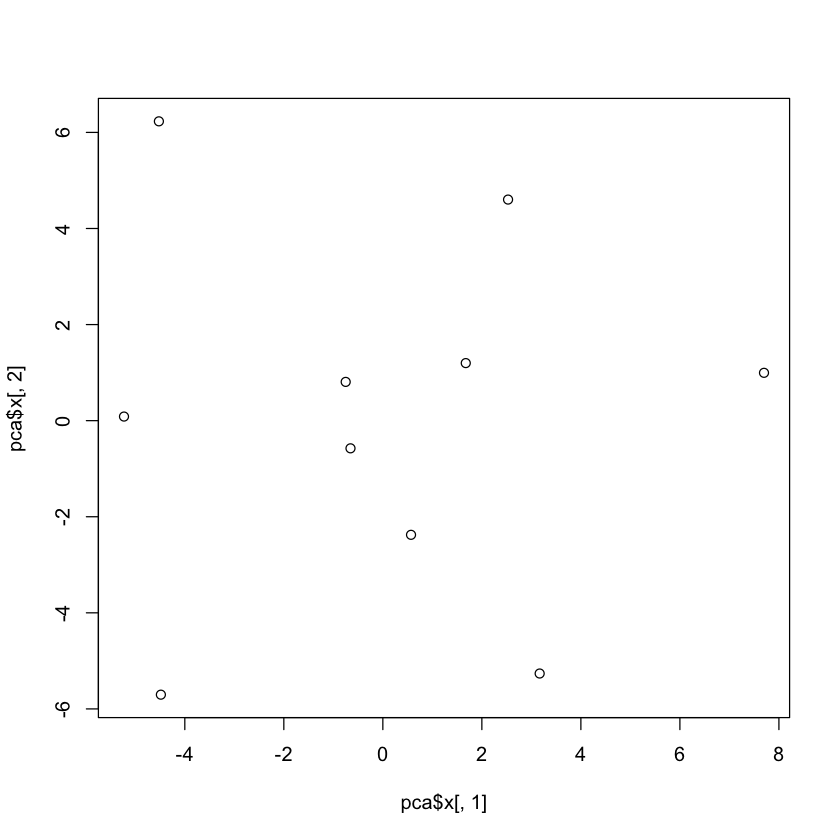

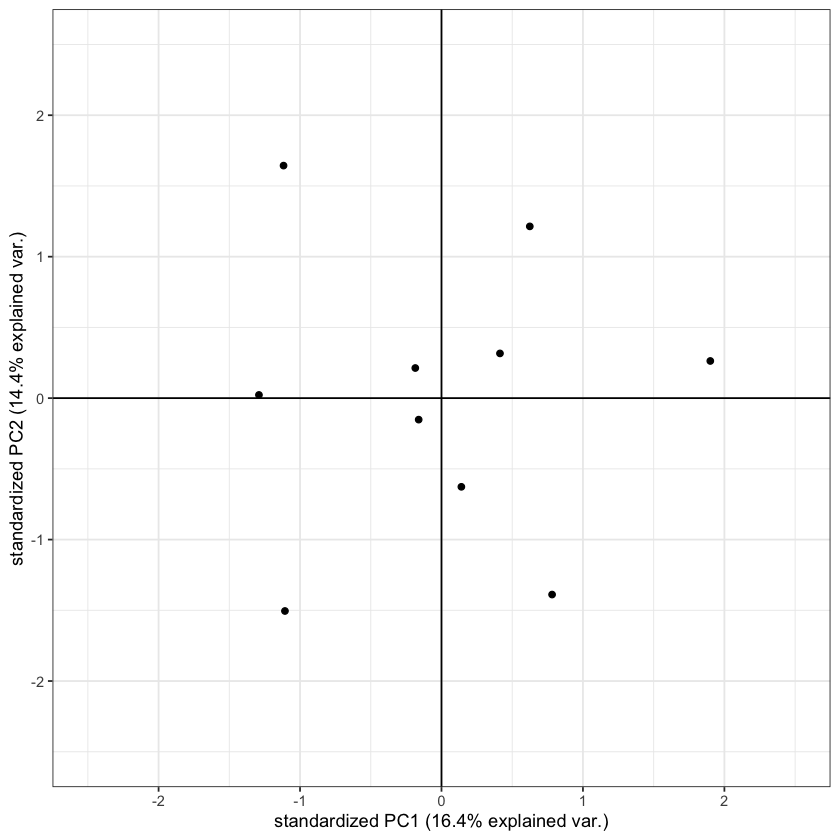

In [42]:
#plotting pc1 and pc2
plot(pca$x[,1], pca$x[,2])

#with ggplot
#Note: ggbiplot automatically calculates the variability explaine by the PC.
ggbiplot(pca, var.axes=F )+
    geom_hline(yintercept=0)+
    geom_vline(xintercept=0)+
    xlim(-2.5,2.5)+ylim(-2.5,2.5)+theme_bw()


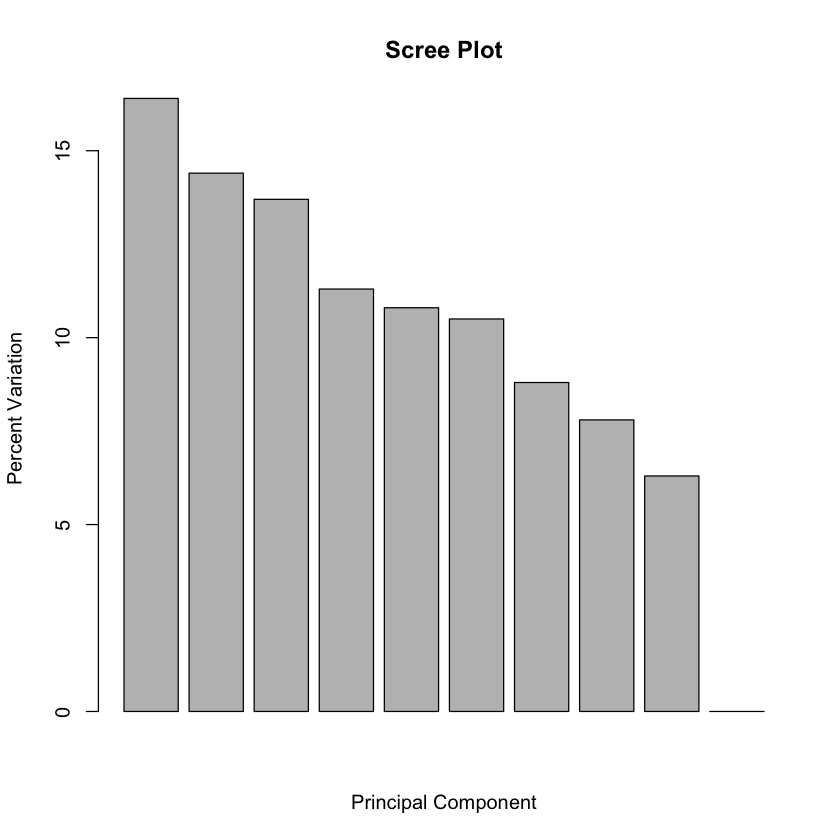

In [43]:
## make a scree plot
pca.var <- pca$sdev^2
pca.var.per <- round(pca.var/sum(pca.var)*100, 1)
barplot(pca.var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")

## Now that we have done all this: 

1. What is ordination?
* Snippy answer is dimensionality reduction  
* A way to project multidimensional data onto a smaller dimensional space 
* PCA, PCOA and NMDS are all ordination techniques 

2. What is PCA?
* Rotation of the original axis to creat new axes to explain the variation in the data.
* If data are measured in different units, they need to be standardized to zero mean and unit variance.
* we are assuming linear realtionship when performing a PCA.
* If you observe a horshoe effect, it might be an indication of the the linearity assumption not being met. 

3. What is PCoA?
* The same as PCA but with different distance measurements. (if the distance measurement is euclidean, the PCoA and PCA are the same)
* In PCoA a dissimilarity matrix is constructed. (these variables can be quantitative, qualitative or mixed)
* Usually for our purposes (abundance data) bray curtis dissimilarity is used and for (presence/absence) jaccard index can be used.
* Also is restricted by lineariry assumption.

4. What is NMDS? 
* Scaling based on ranking and not dissimilarity.
* Ranks generate based on distances via an iterative process
* Overcomes the hurdle of assumed linearity.


    

<u>Sources:</u> <br>
* https://ourcodingclub.github.io/tutorials/ordination/#section2
* https://stat.ethz.ch/R-manual/R-patched/library/MASS/html/rnegbin.html
* Josh Starmer Stat quest 
* https://www.datacamp.com/community/tutorials/pca-analysis-r